In [1]:
# Import Required Depencies:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Read the "cleaned_emissions_data.csv" file into a Pandas DataFrame

df_clean = pd.read_csv('./Resources/cleaned_emissions_data.csv')
df_clean

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
0,Afghanistan,AFG,1970,1.670397,0.436974,0.671986,0.216651,0.047350,0.297436,0.155343
1,Afghanistan,AFG,1971,1.893554,0.359072,0.747456,0.439680,0.043234,0.304112,0.171893
2,Afghanistan,AFG,1972,1.530347,0.190528,0.626544,0.300448,0.046427,0.366400,0.135588
3,Afghanistan,AFG,1973,1.635454,0.310745,0.701918,0.332680,0.067106,0.223005,0.141288
4,Afghanistan,AFG,1974,1.913152,0.304695,0.770914,0.400141,0.070301,0.367102,0.161177
...,...,...,...,...,...,...,...,...,...,...
3153,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,4.749682
3154,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,4.792753
3155,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,4.775633
3156,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,4.497423


In [3]:
# Remove columns "ISO 3166-1 alpha-3" and "Country" as they have string values and are not necessary for the models:

df_clean = df_clean.drop(['ISO 3166-1 alpha-3','Country'], axis=1)

In [4]:
# View Dataframe after dropping columns:

df_clean

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
0,1970,1.670397,0.436974,0.671986,0.216651,0.047350,0.297436,0.155343
1,1971,1.893554,0.359072,0.747456,0.439680,0.043234,0.304112,0.171893
2,1972,1.530347,0.190528,0.626544,0.300448,0.046427,0.366400,0.135588
3,1973,1.635454,0.310745,0.701918,0.332680,0.067106,0.223005,0.141288
4,1974,1.913152,0.304695,0.770914,0.400141,0.070301,0.367102,0.161177
...,...,...,...,...,...,...,...,...
3153,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,4.749682
3154,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,4.792753
3155,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,4.775633
3156,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,4.497423


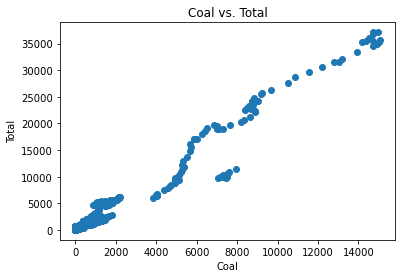

In [5]:
# Plot the Coal & Total to find out if a linear trend exists

plt.scatter(df_clean['Coal'], df_clean['Total'])
plt.title("Coal vs. Total")
plt.xlabel("Coal")
plt.ylabel("Total")
plt.savefig("Graphs/Coal vs Total.png")


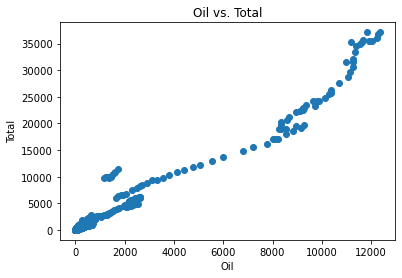

In [6]:
# Plot the Oil & Total to find out if a linear trend exists

plt.scatter(df_clean['Oil'], df_clean['Total'])
plt.title("Oil vs. Total")
plt.xlabel("Oil")
plt.ylabel("Total")
plt.savefig("Graphs/Oil vs Total.png")

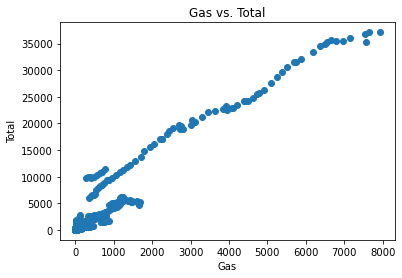

In [7]:
# Plot the Gas & Total to find out if a linear trend exists

plt.scatter(df_clean['Gas'], df_clean['Total'])
plt.title("Gas vs. Total")
plt.xlabel("Gas")
plt.ylabel("Total")
plt.savefig("Graphs/Gas vs Total.png")

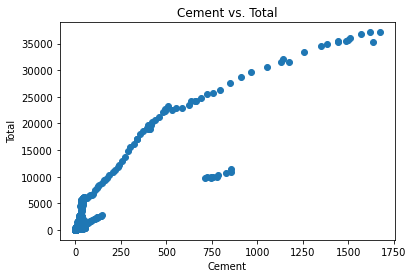

In [8]:
# Plot the Cement & Total to find out if a linear trend exists

plt.scatter(df_clean['Cement'], df_clean['Total'])
plt.title("Cement vs. Total")
plt.xlabel("Cement")
plt.ylabel("Total")
plt.savefig("Graphs/Cement vs Total.png")

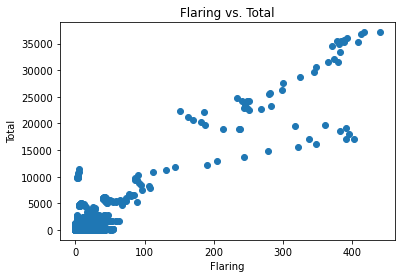

In [9]:
# Plot the Flaring & Total to find out if a linear trend exists

plt.scatter(df_clean['Flaring'], df_clean['Total'])
plt.title("Flaring vs. Total")
plt.xlabel("Flaring")
plt.ylabel("Total")
plt.savefig("Graphs/Flaring vs Total.png")

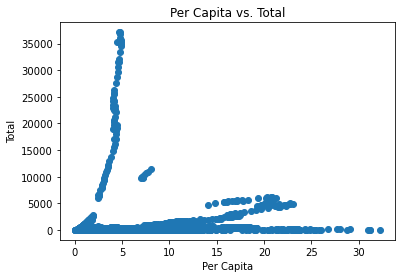

In [10]:
# Plot the Per Capita & Total to find out if a linear trend exists

plt.scatter(df_clean['Per Capita'], df_clean['Total'])
plt.title("Per Capita vs. Total")
plt.xlabel("Per Capita")
plt.ylabel("Total")
plt.savefig("Graphs/Per Capita vs Total.png")

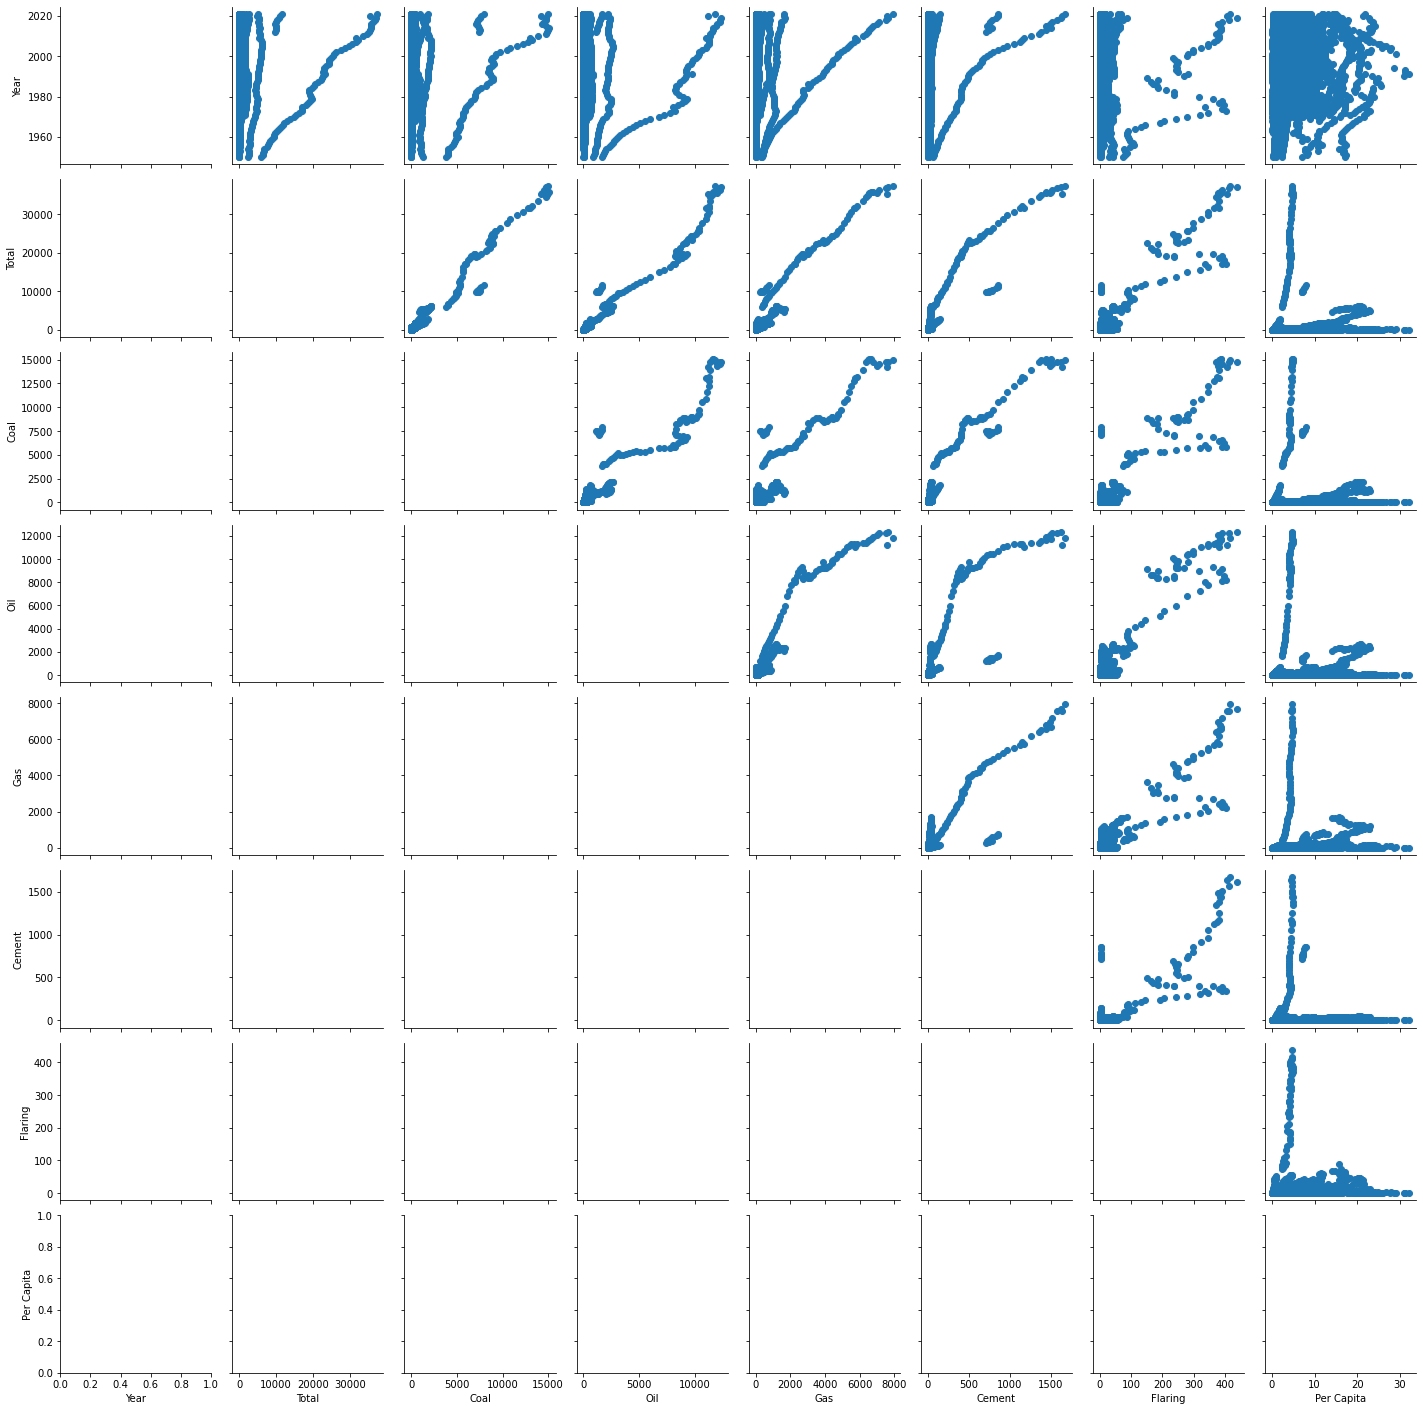

In [11]:
# Correlation Matrix to make all scatter plots at once

# importing seaborn package
import seaborn
  
# Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
seaborn.PairGrid(df_clean).map_upper(plt.scatter)
plt.savefig("./Graphs/Correlatio Matrix.png")

In [12]:
# Assign variables to X that appear to have the most linear relationships with Total
# Use reshape() to create a two-dimensional array of values

X_oil = df_clean["Oil"].values.reshape(-1, 1)
y = df_clean["Total"].values.reshape(-1, 1)

print("Shape: ", X_oil.shape, y.shape)

Shape:  (3158, 1) (3158, 1)


In [13]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X_oil, y, random_state=42)

In [14]:
# Create the model

model = LinearRegression()

In [15]:
# Fit the model to the training data. 

model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

# Use model to make predictions
predicted = model.predict(X_test)

# Call the `score()` method on the model to show the score

print("Model's score is: ")
model.score(X_test, y_test)

Model's score is: 


0.9741636246236764